In [1]:
import pandas as pd
dataset = pd.read_csv("spambase.csv") 
dataset.head(10)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,spam
0,0,640,640,0,320,0,0,0,0,0,...,0,0,0,0,0,0,778,0,0,1
1,210,280,500,0,140,280,210,70,0,940,...,0,0,0,0,132,0,372,180,48,1
2,60,0,710,0,1230,190,190,120,640,250,...,60,0,0,10,143,0,276,184,10,1
3,0,0,0,0,630,0,310,630,310,630,...,0,0,0,0,137,0,137,0,0,1
4,0,0,0,0,630,0,310,630,310,630,...,0,0,0,0,135,0,135,0,0,1
5,0,0,0,0,1850,0,0,1850,0,0,...,0,0,0,0,223,0,0,0,0,1
6,0,0,0,0,1920,0,0,0,0,640,...,0,0,0,0,54,0,164,54,0,1
7,0,0,0,0,1880,0,0,1880,0,0,...,0,0,0,0,206,0,0,0,0,1
8,150,0,460,0,610,0,300,0,920,760,...,0,0,0,0,271,0,181,203,22,1
9,60,120,770,0,190,320,380,0,60,0,...,0,0,0,40,30,0,244,81,0,1


## 1.¿Cuáles son las 10 palabras más encontradas en correos con SPAM y en correos No SPAM? ¿Hay palabras en común? ¿Algunas llaman la atención?

In [2]:
column_sum = dataset.groupby(by="spam", as_index=False).sum()

In [3]:
column_sum

,spam,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,...,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#
0,0,204860,681569,559220,2470,504739,124190,26160,107100,106080,...,1159138,800669,22840,142820,140182,442116,63242,306634,32475,60536
1,1,276190,298510,732080,298550,931799,317050,499309,377360,308320,...,226790,26700,2210,3810,37299,197563,14864,931352,316328,143003


In [4]:
spam_freqs = column_sum[column_sum['spam'] == 1].drop(columns='spam')
no_spam_freqs = column_sum[column_sum['spam'] == 0].drop(columns='spam')

In [5]:
import numpy as np
def get_top_n_freqs(original_freqs, n):
    sorted_freqs = original_freqs.copy()
    sorted_freqs[:] = np.sort(sorted_freqs, axis=1)[:, ::-1]    
    top_n_freqs = sorted_freqs[sorted_freqs.columns[:n]]
    top_n_words = list(map(lambda x: x.replace('word_freq_', ''),top_n_freqs))
    return top_n_freqs, top_n_words


In [6]:
top_10_spam, top_10_spam_words = get_top_n_freqs(spam_freqs, 10)
top_10_spam

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail
1,4105599,2502597,997100,939790,931799,931352,732080,635470,578759,521250


In [7]:
top_10_spam_words

['make',
 'address',
 'all',
 '3d',
 'our',
 'over',
 'remove',
 'internet',
 'order',
 'mail']

In [8]:
top_10_no_spam, top_10_no_spam_words = get_top_n_freqs(no_spam_freqs, 10)
top_10_no_spam

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail
0,3541702,3527559,2496576,1495268,1223098,1204398,1159138,800669,681569,604460


In [9]:
top_10_no_spam_words

['make',
 'address',
 'all',
 '3d',
 'our',
 'over',
 'remove',
 'internet',
 'order',
 'mail']

In [10]:
spam_words = set(top_10_spam_words)
no_spam_words = set(top_10_no_spam_words)

intersection = spam_words & no_spam_words
print(len(intersection))
intersection

10


{'3d',
 'address',
 'all',
 'internet',
 'mail',
 'make',
 'order',
 'our',
 'over',
 'remove'}

Las 10 más encontradas tanto en SPAM como No SPAM son las mismas.
Llama la atención la palabra 3d, es la única que parece fuera de contexto, más que nada porque es muy poco probable que se encuentre en un mail a primera vista. El resto de las palabras son de uso diario.

## 2.Separe el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba (70% y 30% respectivamente).

In [11]:
from sklearn.model_selection import train_test_split
# Obtenemos los atributos y target
X = (dataset.drop(columns="spam") * 100).astype(int)
#X = dataset2.drop(columns="spam")
y = dataset["spam"]
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.3)

## 3.Utilizando un clasificador de Bayes ingenuo, entrene con el conjunto de entrenamiento.

In [12]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer

# tfidf_transformer = TfidfTransformer()
# X_tfidf = tfidf_transformer.fit_transform(X_train)
mnb = MultinomialNB(alpha=0.001)
# mnb.fit(X_tfidf, y_train)
mnb.fit(X_train, y_train)

MultinomialNB(alpha=0.001)

## 4.Utilizando un clasificador de Regresión Logística, entrene con el conjunto de entrenamiento (en este caso, normalice los datos).

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lo transformamos en DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

lr = LogisticRegression().fit(X_train_scaled, y_train)

## 5.Calcule la matriz de confusión del conjunto de evaluación para ambos modelos. ¿Qué tipo de error comete más cada modelo? ¿Cuál de los dos tipos de error crees que es más importante para este problema?

In [14]:
from sklearn.metrics import confusion_matrix

En las filas esta el valor real y en las columnas el valor predicho.

In [15]:
mnb_conf_mat = confusion_matrix(y_pred=mnb.predict(X_test),y_true=y_test, normalize='true')
mnb_conf_mat

array([[0.81257414, 0.18742586],
       [0.04089219, 0.95910781]])

In [16]:
lr_conf_mat = confusion_matrix(y_pred=lr.predict(X_test_scaled),y_true=y_test, normalize='true')
lr_conf_mat

array([[0.94780546, 0.05219454],
       [0.21561338, 0.78438662]])

Tenemos dos posibilidades de error: 
- Predecir que es SPAM cuando no lo es (falso positivo o error de tipo 1)
- Predecir que NO es SPAM cuando lo es (falso negativo o error de tipo 2)

En este problema en principio podría ser más grave el error de tipo 1 ya que si es un mail importante que lo envía un jefe/proveedor/cliente muy importante y es mal clasificado como SPAM podría costarnos nuestro trabajo o nuestra reputación. En cambio cuando decimos que no es SPAM y lo es, cuando revisemos nuestra casilla de correos seguramente nos demos cuenta casi inmediatamente de que lo es, pero habiendo ya filtrado miles de correos (teniendo una buena relación costo-beneficio).

Esto es así siempre que asumamos que la ciberseguridad no está en juego. Si se trata de un mail con SPAM pero adentro tiene algún tipo de phishing, se podrían vulnerar datos sensibles (conexión a bases de datos, credenciales, contraseñas, entre otras) y se podría generar pérdida de confianza por parte de clientes, cortando presupuesto tanto para la empresa como para proyectos.

Por simplicidad asumiremos que no estamos en este último caso. 

In [17]:
tn, fp, fn, tp = mnb_conf_mat.ravel()
print('Naive Bayes Multinomial')
print(f'Verdaderos Positivos: {tp:.2f}')
print(f'Falsos Positivos: {fp:.2f}')
print(f'Falsos Negativos: {fn:.2f}')
print(f'Verdaderos Negativos: {tn:.2f}')


Naive Bayes Multinomial
Verdaderos Positivos: 0.96
Falsos Positivos: 0.19
Falsos Negativos: 0.04
Verdaderos Negativos: 0.81


In [18]:
tn, fp, fn, tp = lr_conf_mat.ravel()
print('Regresión Logística')
print(f'Verdaderos Positivos: {tp:.2f}')
print(f'Falsos Positivos: {fp:.2f}')
print(f'Falsos Negativos: {fn:.2f}')
print(f'Verdaderos Negativos: {tn:.2f}')


Regresión Logística
Verdaderos Positivos: 0.78
Falsos Positivos: 0.05
Falsos Negativos: 0.22
Verdaderos Negativos: 0.95


En cuanto a error de tipo I y II, 
Naive Bayes Multinomial comete más error de tipo I. 
En cambio, Regresión Logística comete más error de tipo II.

## 6. Calcule la precisión y la recuperación de ambos modelos. Para cada métrica, ¿cuál es el mejor modelo? ¿Cómo se relacionan estas métricas con los tipos de errores analizados en el punto anterior? Expanda su respuesta.

In [19]:
def calculate_metrics(conf_mat):
    tn, fp, fn, tp = conf_mat.ravel()
    precision = tp / (tp + fp)
    recall = tp / (tp + fn) 
    return precision, recall

In [20]:
calculate_metrics(mnb_conf_mat)

(0.836528254280835, 0.9591078066914498)

In [21]:
calculate_metrics(lr_conf_mat)

(0.9376097074993806, 0.7843866171003717)

El mejor modelo seria el de Regresion Logistica ya que, segun lo comentado anteriormente, se prefiere cometer error de tipo I antes de error de tipo II, por lo tanto, al tener una mayor precision, nos aseguramos de que se minimice la probabilidad de cometer error de tipo I.
En el modelo Naive Bayes Multinomial se puede ver que tiene una baja precision y una alta recuperacion, esto se relaciona con los errores analizados anteriormente 

### Precisión

La precisión mide los casos verdaderos positivos sobre el total de predicciones positivas (verdaderos positivos + falsos positivos). Es decir, de todos los casos que el modelo predice como positivos, cuántos realmente lo son.

$$
\text{Precisión}_{mnb} = \frac{TP}{TP + FP} = \frac{0.96}{0.96 + 0.18} = 0.8396
$$
$$
\text{Precisión}_{lr} = \frac{TP}{TP + FP} = \frac{0.77}{0.77 + 0.05} = 0.9408
$$

Esto nos dice que:
* En el caso de MNB, el 83.96% de las veces que el modelo predice un positivo, esta predicción es correcta.
*  En el caso de LR, el 94.08% de las veces que el modelo predice un positivo, esta predicción es correcta.

### Recuperación

La recuperación mide los casos verdaderos positivos sobre todos los casos realmente positivos (verdaderos positivos + falsos negativos). Es decir, de todos los casos que son positivos, cuántos fueron correctamente identificados por el modelo.

$$
\text{Recuperación}_{mnb} = \frac{TP}{TP + FN} = \frac{0.96}{0.96 + 0.04} = 0.9621
$$
$$
\text{Recuperación}_{lr} = \frac{TP}{TP + FN} = \frac{0.77}{0.77 + 0.23} = 0.7689
$$
Esto no dice que
 * En el caso de MNB, el modelo identifica correctamente el 96.21% de los casos positivos.
  * En el caso de LR, el modelo identifica correctamente el 76.89% de los casos positivos.

## 7. Obtenga la curva ROC y el AUC (Área Bajo la Curva ROC) de ambos modelos.

1381


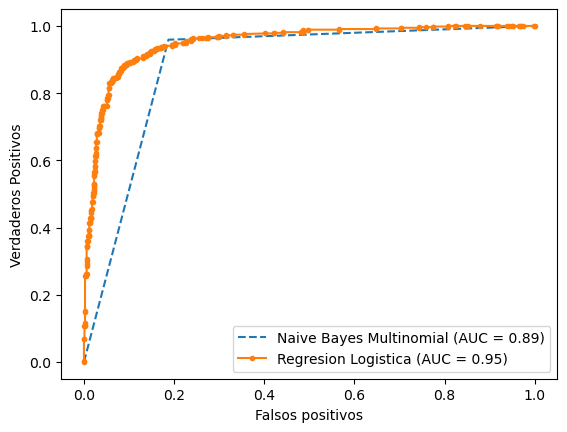

In [25]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

mnb_probs = mnb.predict_proba(X_test) 
mnb_probs = mnb_probs[:, 1]

lr_probs = lr.predict_proba(X_test_scaled) 
lr_probs = lr_probs[:, 1]

print(len(mnb_probs))
mnb_fpr, mnb_tpr,_ = roc_curve(y_test, mnb_probs)
mnb_auc = roc_auc_score(y_test, mnb_probs)

lr_fpr, lr_tpr, lr_thres = roc_curve(y_test, lr_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

plt.plot(mnb_fpr, mnb_tpr, linestyle='--',label=f'Naive Bayes Multinomial (AUC = {mnb_auc:.2f})')
plt.plot(lr_fpr, lr_tpr, marker='.', label=f'Regresion Logistica (AUC = {lr_auc:.2f})')

plt.xlabel('Falsos positivos')
plt.ylabel('Verdaderos Positivos')
plt.legend()

plt.show()

El problema de obtener una curva ROC de pocos puntos con Multinomial Naive Bayes (MNB) suele estar relacionado con la naturaleza discreta de los datos de salida del modelo. Esto sucede porque MNB, al trabajar con datos de conteo, puede generar probabilidades que no varían lo suficiente entre las diferentes instancias, resultando en un número limitado de umbrales distintos cuando se construye la curva ROC.